# Visualization of asteroid positions in the sky as observed by Vera Rubin observatory

The code below generates a sky map from Vera Rubin data in the `../results/real_data` directory. It shows where the asteroids were first discovered in the sky.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('../results/e2e.csv')
df_stats = pd.read_csv('../results/stats.csv')

In [6]:
df

,ObjID,fieldMJD_TAI,fieldRA_deg,fieldDec_deg,RA_deg,Dec_deg,astrometricSigma_deg,optFilter,trailedSourceMag,trailedSourceMagSigma,fiveSigmaDepth_mag,phase_deg,Range_LTC_km,RangeRate_LTC_km_s,Obj_Sun_LTC_km
0,K14X37V,60847.151872,241.505253,-18.361065,239.917374,-18.575089,0.000003,i,16.544820,0.001278,23.751429,6.087280,5.381293e+08,14.298007,6.760073e+08
1,K14X37V,60847.170984,241.505195,-18.360967,239.914905,-18.574853,0.000003,z,16.543867,0.001793,23.061513,6.091406,5.381530e+08,14.350470,6.760104e+08
2,K06WK2G,60847.200983,250.447897,-17.981959,249.600064,-19.140082,0.000003,z,16.286249,0.001291,23.479097,4.358719,5.125286e+08,10.839063,6.580006e+08
3,K06WK2G,60847.227013,250.447920,-17.981985,249.596000,-19.140290,0.000003,i,16.289172,0.001300,23.457570,4.364927,5.125531e+08,10.907692,6.580058e+08
4,K01H08O,60847.246888,321.461701,-16.567624,322.183568,-15.649871,0.000003,i,16.851181,0.001547,23.661033,9.826519,5.717700e+08,-17.390732,6.799612e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667583,K00A83M,60940.076575,280.459066,-23.445763,279.733652,-23.998094,0.000003,i,16.233449,0.001087,23.775224,15.947184,4.918408e+08,26.901434,5.384169e+08
667584,K19W00U,60940.076575,280.459066,-23.445763,280.254156,-23.583222,0.000003,i,16.231309,0.001081,23.779829,15.908180,4.910574e+08,23.463492,5.388512e+08
667585,K21S56V,60940.079720,278.007968,-31.488628,277.947431,-31.024591,0.000003,i,16.123773,0.001182,23.489359,16.600458,4.786095e+08,24.140766,5.207498e+08
667586,K24J50A,60940.083294,289.773478,-29.664956,290.159138,-29.874703,0.000003,i,16.351862,0.001244,23.607560,14.519676,5.028083e+08,27.434860,5.683628e+08


In [7]:
df_stats

,ObjID,optFilter,number_obs,min_apparent_mag,max_apparent_mag,median_apparent_mag,min_phase,max_phase,date_linked_MJD
0,J77F00Z,g,1,16.047326,16.047326,16.047326,14.397713,14.397713,60874.0
1,J77F00Z,i,4,16.019461,16.088384,16.046335,14.133757,14.746297,60874.0
2,J77F00Z,r,3,16.087788,16.275062,16.088388,14.749260,15.910641,60874.0
3,J77F00Z,u,0,NaN,NaN,NaN,NaN,NaN,NaN
4,J77F00Z,y,3,16.202704,16.228411,16.211147,15.563573,15.693451,60874.0
...,...,...,...,...,...,...,...,...,...
103699,K24J50A,i,5,16.165213,16.351862,16.240159,13.241557,14.519676,60927.0
103700,K24J50A,r,8,16.180186,16.350342,16.217054,13.369259,14.517906,60927.0
103701,K24J50A,u,1,16.312447,16.312447,16.312447,14.292629,14.292629,60927.0
103702,K24J50A,y,5,16.003444,16.132873,16.118602,11.715774,12.979711,60927.0


In [8]:
df_disc = df_stats.query('date_linked_MJD > 0').groupby('ObjID').first()['date_linked_MJD'].reset_index()

In [9]:
df_disc

,ObjID,date_linked_MJD
0,I07F00A,60874.0
1,I75V00C,60923.0
2,I78S00A,60867.0
3,I91C00A,60938.0
4,I92E00A,60895.0
...,...,...
17279,T3S3310,60920.0
17280,T3S3365,60915.0
17281,T3S4035,60923.0
17282,T3S4101,60916.0


In [10]:
df['night'] = (df['fieldMJD_TAI'] - 60847).astype('int')

In [11]:
df

,ObjID,fieldMJD_TAI,fieldRA_deg,fieldDec_deg,RA_deg,Dec_deg,astrometricSigma_deg,optFilter,trailedSourceMag,trailedSourceMagSigma,fiveSigmaDepth_mag,phase_deg,Range_LTC_km,RangeRate_LTC_km_s,Obj_Sun_LTC_km,night
0,K14X37V,60847.151872,241.505253,-18.361065,239.917374,-18.575089,0.000003,i,16.544820,0.001278,23.751429,6.087280,5.381293e+08,14.298007,6.760073e+08,0
1,K14X37V,60847.170984,241.505195,-18.360967,239.914905,-18.574853,0.000003,z,16.543867,0.001793,23.061513,6.091406,5.381530e+08,14.350470,6.760104e+08,0
2,K06WK2G,60847.200983,250.447897,-17.981959,249.600064,-19.140082,0.000003,z,16.286249,0.001291,23.479097,4.358719,5.125286e+08,10.839063,6.580006e+08,0
3,K06WK2G,60847.227013,250.447920,-17.981985,249.596000,-19.140290,0.000003,i,16.289172,0.001300,23.457570,4.364927,5.125531e+08,10.907692,6.580058e+08,0
4,K01H08O,60847.246888,321.461701,-16.567624,322.183568,-15.649871,0.000003,i,16.851181,0.001547,23.661033,9.826519,5.717700e+08,-17.390732,6.799612e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667583,K00A83M,60940.076575,280.459066,-23.445763,279.733652,-23.998094,0.000003,i,16.233449,0.001087,23.775224,15.947184,4.918408e+08,26.901434,5.384169e+08,93
667584,K19W00U,60940.076575,280.459066,-23.445763,280.254156,-23.583222,0.000003,i,16.231309,0.001081,23.779829,15.908180,4.910574e+08,23.463492,5.388512e+08,93
667585,K21S56V,60940.079720,278.007968,-31.488628,277.947431,-31.024591,0.000003,i,16.123773,0.001182,23.489359,16.600458,4.786095e+08,24.140766,5.207498e+08,93
667586,K24J50A,60940.083294,289.773478,-29.664956,290.159138,-29.874703,0.000003,i,16.351862,0.001244,23.607560,14.519676,5.028083e+08,27.434860,5.683628e+08,93


In [12]:
df['dateMJD'] = (df['fieldMJD_TAI'].astype('int')).astype('float')

In [13]:
df

,ObjID,fieldMJD_TAI,fieldRA_deg,fieldDec_deg,RA_deg,Dec_deg,astrometricSigma_deg,optFilter,trailedSourceMag,trailedSourceMagSigma,fiveSigmaDepth_mag,phase_deg,Range_LTC_km,RangeRate_LTC_km_s,Obj_Sun_LTC_km,night,dateMJD
0,K14X37V,60847.151872,241.505253,-18.361065,239.917374,-18.575089,0.000003,i,16.544820,0.001278,23.751429,6.087280,5.381293e+08,14.298007,6.760073e+08,0,60847.0
1,K14X37V,60847.170984,241.505195,-18.360967,239.914905,-18.574853,0.000003,z,16.543867,0.001793,23.061513,6.091406,5.381530e+08,14.350470,6.760104e+08,0,60847.0
2,K06WK2G,60847.200983,250.447897,-17.981959,249.600064,-19.140082,0.000003,z,16.286249,0.001291,23.479097,4.358719,5.125286e+08,10.839063,6.580006e+08,0,60847.0
3,K06WK2G,60847.227013,250.447920,-17.981985,249.596000,-19.140290,0.000003,i,16.289172,0.001300,23.457570,4.364927,5.125531e+08,10.907692,6.580058e+08,0,60847.0
4,K01H08O,60847.246888,321.461701,-16.567624,322.183568,-15.649871,0.000003,i,16.851181,0.001547,23.661033,9.826519,5.717700e+08,-17.390732,6.799612e+08,0,60847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667583,K00A83M,60940.076575,280.459066,-23.445763,279.733652,-23.998094,0.000003,i,16.233449,0.001087,23.775224,15.947184,4.918408e+08,26.901434,5.384169e+08,93,60940.0
667584,K19W00U,60940.076575,280.459066,-23.445763,280.254156,-23.583222,0.000003,i,16.231309,0.001081,23.779829,15.908180,4.910574e+08,23.463492,5.388512e+08,93,60940.0
667585,K21S56V,60940.079720,278.007968,-31.488628,277.947431,-31.024591,0.000003,i,16.123773,0.001182,23.489359,16.600458,4.786095e+08,24.140766,5.207498e+08,93,60940.0
667586,K24J50A,60940.083294,289.773478,-29.664956,290.159138,-29.874703,0.000003,i,16.351862,0.001244,23.607560,14.519676,5.028083e+08,27.434860,5.683628e+08,93,60940.0


In [14]:
df_unique_nights = df.drop_duplicates(subset="ObjID", keep="first")

In [15]:
df_first_discovered = pd.merge(df_unique_nights, df_disc, on='ObjID')

In [16]:
df_first_discovered

,ObjID,fieldMJD_TAI,fieldRA_deg,fieldDec_deg,RA_deg,Dec_deg,astrometricSigma_deg,optFilter,trailedSourceMag,trailedSourceMagSigma,fiveSigmaDepth_mag,phase_deg,Range_LTC_km,RangeRate_LTC_km_s,Obj_Sun_LTC_km,night,dateMJD,date_linked_MJD
0,K14X37V,60847.151872,241.505253,-18.361065,239.917374,-18.575089,0.000003,i,16.544820,0.001278,23.751429,6.087280,5.381293e+08,14.298007,6.760073e+08,0,60847.0,60903.0
1,K06WK2G,60847.200983,250.447897,-17.981959,249.600064,-19.140082,0.000003,z,16.286249,0.001291,23.479097,4.358719,5.125286e+08,10.839063,6.580006e+08,0,60847.0,60860.0
2,K01H08O,60847.246888,321.461701,-16.567624,322.183568,-15.649871,0.000003,i,16.851181,0.001547,23.661033,9.826519,5.717700e+08,-17.390732,6.799612e+08,0,60847.0,60865.0
3,K17FB8E,60847.297721,330.127462,-5.856053,331.019694,-5.916618,0.000003,i,16.345997,0.001128,23.803792,13.159351,4.972027e+08,-24.073710,5.856365e+08,0,60847.0,60865.0
4,K17U00P,60847.356657,269.347582,-20.952559,267.694260,-20.975277,0.000003,z,16.204434,0.002065,22.440894,0.699122,5.397886e+08,-1.736708,6.916343e+08,0,60847.0,60858.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17279,K15X52Y,60930.097018,269.642449,-29.175413,271.079315,-29.471685,0.000003,r,16.016759,0.000873,24.020838,16.688246,4.615293e+08,23.353095,5.135474e+08,83,60930.0,60938.0
17280,K13A72K,60931.037908,251.132157,-29.305579,251.609784,-29.485283,0.000003,r,15.995082,0.000948,23.827812,18.046410,4.755190e+08,24.544324,4.831111e+08,84,60931.0,60938.0
17281,K05W47U,60931.086878,266.180009,-26.053178,267.565444,-27.386810,0.000003,r,15.998063,0.000916,23.901419,17.204747,4.619090e+08,22.699093,5.044317e+08,84,60931.0,60939.0
17282,K06C65S,60933.066298,276.112382,-18.057970,277.164552,-18.160347,0.000003,i,16.004258,0.001180,23.370545,16.355209,4.579741e+08,23.791066,5.169383e+08,86,60933.0,60938.0


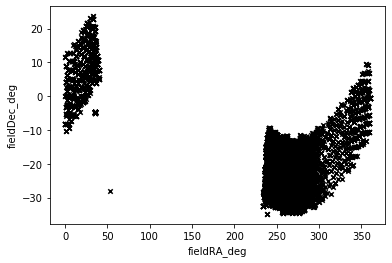

In [17]:
df_first_discovered.plot.scatter('fieldRA_deg','fieldDec_deg', marker='x', s=20, c='k')

In [18]:
df_first_discovered['Dec'] = np.deg2rad(df_first_discovered['fieldDec_deg'].values)
ra = df_first_discovered['fieldRA_deg'].values
mask = ra>180
ra[mask] = ra[mask]-360
df_first_discovered['RA'] = -np.deg2rad(ra)

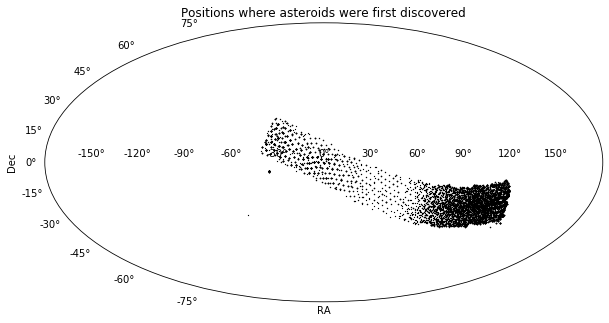

In [20]:
fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(111, projection='mollweide')
ax.set_title(f'Positions where asteroids were first discovered')
df_first_discovered.plot.scatter('RA','Dec',ax=ax,c='k',s=0.1,marker='x')

In [21]:
df_orbit = pd.read_csv('../results/real_data/orbits.csv')
df_orbit

,ObjID,q,e,inc,node,argPeri,t_p_MJD_TDB,epochMJD_TDB,FORMAT
0,K24H05M,1.978432,0.189115,12.373906,70.477184,181.249492,60491.910177,60600.0,COM
1,K22A56H,2.382736,0.150071,12.803460,110.596049,340.762752,61233.529925,60600.0,COM
2,K24RC8T,2.318348,0.270104,15.062575,203.688594,174.991177,60595.435175,60600.0,COM
3,K14Wh7L,2.186412,0.149198,10.063611,43.278652,329.769900,59829.325713,60000.0,COM
4,K08H15U,4.916185,0.072917,10.363971,133.267690,207.598148,60198.367211,60800.0,COM
...,...,...,...,...,...,...,...,...,...
1442120,K21O07P,2.194100,0.188609,12.900423,178.265694,125.121604,59365.079752,60800.0,COM
1442121,K21RH9J,2.772692,0.074731,11.280710,149.017746,126.975428,59041.205791,60800.0,COM
1442122,K21V23V,2.896559,0.048025,17.973951,223.686592,335.787005,60309.432530,60800.0,COM
1442123,K14N92T,2.904595,0.077896,10.667483,106.591061,217.142064,61089.549426,60800.0,COM


In [22]:
def compute_orbit_type(df):
    q = df["q"].values
    e = df["e"].values
    i = df["inc"].values

    # Derived quantities
    a = q / (1 - e)
    Q = a * (1 + e)
    T = (5.2 / a) + 2 * np.cos(np.radians(i)) * np.sqrt((a / 5.2) * (1 - e**2))

    # Constants
    a_jup = 5.2
    a_nep = 30.1
    q_mars = 1.666

    # Default to "Unusual Other"
    result = np.full(len(df), 99)
    unclassified = np.full(len(df), True)

    def assign(mask, code):
        nonlocal result, unclassified
        update = mask & unclassified
        result[update] = code
        unclassified[update] = False

    assign(e > 1, 30)                                  # Hyperbolic
    assign(e == 1, 31)                                 # Parabolic
    assign((a < 1) & (Q < 0.983), 0)                   # Atira
    assign((a < 1) & (Q >= 0.983), 1)                  # Aten
    assign((a >= 1) & (q < 1.017), 2)                  # Apollo
    assign((a >= 1) & (q >= 1.017) & (q < 1.3), 3)     # Amor
    assign((a >= 1) & (Q < q_mars), 9)                 # Inner Other
    assign((1 <= a) & (a < 3.2) & (q >= 1.3) & (q < q_mars), 10)  # Mars Crosser
    assign((1 <= a) & (a < 3.27831) & (i < 75), 11)    # Main Belt
    assign((4.8 < a) & (a < 5.4) & (e < 0.3), 12)      # Jupiter Trojan
    assign((a < a_jup), 19)                            # Middle Other
    assign((a >= 1) & (T > 2) & (T < 3), 20)           # Jupiter Coupled
    assign((29.8 < a) & (a < 30.4), 21)                # Neptune Trojan
    assign((a_jup <= a) & (a < a_nep), 22)             # Centaur
    assign((a >= a_nep), 23)                           # TNO

    return result


In [23]:
df_orbit['Type'] = compute_orbit_type(df_orbit)

In [24]:
df_orbit

,ObjID,q,e,inc,node,argPeri,t_p_MJD_TDB,epochMJD_TDB,FORMAT,Type
0,K24H05M,1.978432,0.189115,12.373906,70.477184,181.249492,60491.910177,60600.0,COM,11
1,K22A56H,2.382736,0.150071,12.803460,110.596049,340.762752,61233.529925,60600.0,COM,11
2,K24RC8T,2.318348,0.270104,15.062575,203.688594,174.991177,60595.435175,60600.0,COM,11
3,K14Wh7L,2.186412,0.149198,10.063611,43.278652,329.769900,59829.325713,60000.0,COM,11
4,K08H15U,4.916185,0.072917,10.363971,133.267690,207.598148,60198.367211,60800.0,COM,12
...,...,...,...,...,...,...,...,...,...,...
1442120,K21O07P,2.194100,0.188609,12.900423,178.265694,125.121604,59365.079752,60800.0,COM,11
1442121,K21RH9J,2.772692,0.074731,11.280710,149.017746,126.975428,59041.205791,60800.0,COM,11
1442122,K21V23V,2.896559,0.048025,17.973951,223.686592,335.787005,60309.432530,60800.0,COM,11
1442123,K14N92T,2.904595,0.077896,10.667483,106.591061,217.142064,61089.549426,60800.0,COM,11


In [25]:
df_real = pd.merge(df_first_discovered, df_orbit, on='ObjID')

In [26]:
df_real

,ObjID,fieldMJD_TAI,fieldRA_deg,fieldDec_deg,RA_deg,Dec_deg,astrometricSigma_deg,optFilter,trailedSourceMag,trailedSourceMagSigma,...,RA,q,e,inc,node,argPeri,t_p_MJD_TDB,epochMJD_TDB,FORMAT,Type
0,K14X37V,60847.151872,-118.494747,-18.361065,239.917374,-18.575089,0.000003,i,16.544820,0.001278,...,2.068123,3.170446,0.200768,4.093232,89.939718,16.082258,59841.203571,60400.0,COM,19
1,K06WK2G,60847.200983,-109.552103,-17.981959,249.600064,-19.140082,0.000003,z,16.286249,0.001291,...,1.912045,3.158241,0.203121,11.157524,86.785630,35.979134,59943.120300,60800.0,COM,19
2,K01H08O,60847.246888,-38.538299,-16.567624,322.183568,-15.649871,0.000003,i,16.851181,0.001547,...,0.672620,2.605096,0.323422,25.714807,128.440044,43.101333,60015.195550,60800.0,COM,19
3,K17FB8E,60847.297721,-29.872538,-5.856053,331.019694,-5.916618,0.000003,i,16.345997,0.001128,...,0.521374,2.353626,0.255721,4.730684,226.580342,254.288722,57609.514444,59600.0,COM,11
4,K17U00P,60847.356657,-90.652418,-20.952559,267.694260,-20.975277,0.000003,z,16.204434,0.002065,...,1.582183,0.849404,0.697700,2.350448,214.145288,224.526389,58078.887744,59000.0,COM,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17278,K15X52Y,60930.097018,-90.357551,-29.175413,271.079315,-29.471685,0.000003,r,16.016759,0.000873,...,1.577037,2.791300,0.140679,27.313815,97.122920,312.781451,59423.198745,60400.0,COM,11
17279,K13A72K,60931.037908,-108.867843,-29.305579,251.609784,-29.485283,0.000003,r,15.995082,0.000948,...,1.900102,2.766113,0.077099,12.193182,57.747198,34.334307,59979.363525,60400.0,COM,11
17280,K05W47U,60931.086878,-93.819991,-26.053178,267.565444,-27.386810,0.000003,r,15.998063,0.000916,...,1.637468,2.509426,0.187229,5.212867,61.102182,352.181700,57577.347408,59000.0,COM,11
17281,K06C65S,60933.066298,-83.887618,-18.057970,277.164552,-18.160347,0.000003,i,16.004258,0.001180,...,1.464115,1.854962,0.306225,6.563225,156.726830,303.224527,58434.057289,60000.0,COM,11


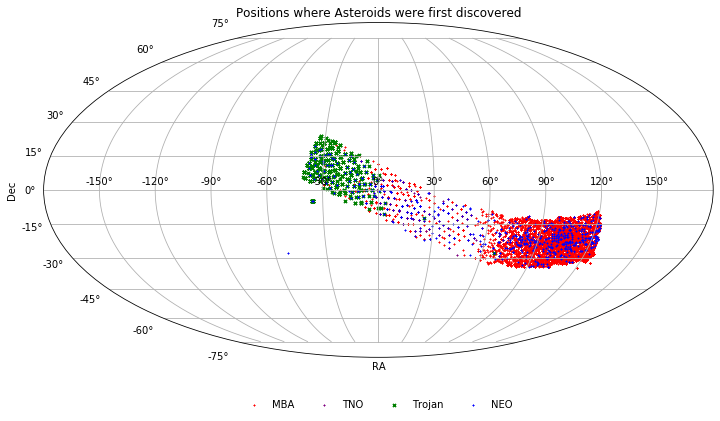

In [38]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='mollweide')
ax.set_title(f'Positions where Asteroids were first discovered')
df_real_mba = df_real.query('Type == 11')
df_real_tno = df_real.query('Type == 23')
df_real_trojan = df_real.query('Type == 12')
df_real_neo = df_real.query('Type == 0 or Type == 1 or Type == 2 or Type == 3')
df_real_mba.plot.scatter('RA','Dec',ax=ax,c='r',s=1,marker='x', label='MBA')
df_real_tno.plot.scatter('RA','Dec',ax=ax,c='purple',s=1,marker='x', label='TNO')
df_real_trojan.plot.scatter('RA','Dec',ax=ax,c='green',s=10,marker='x', label='Trojan')
df_real_neo.plot.scatter('RA','Dec',ax=ax,c='blue',s=1,marker='x', label='NEO')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False)
ax.grid()

In [30]:
! rm -f ../results/real_asteroids/*.png

for t in range(94):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='mollweide')
    ax.set_title(f'Night: {t+1}')
    df_first_discovered_night = df_first_discovered.query(f'night == {t}')
    df_previous_discovered_night = df_first_discovered.query(f'night < {t}')
    #df_previous_discovered_night.plot.scatter('RA','Dec',ax=ax,c='gray',s=0.01,marker='x',label='Previous nights')
    df_first_discovered_night.plot.scatter('RA','Dec',ax=ax,c='r',s=0.5,marker='x', label='Current night')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False)
    ax.text(np.deg2rad(15), np.deg2rad(45),f'Total discoveries: {df_previous_discovered_night.shape[0]}')
    ax.text(np.deg2rad(15), np.deg2rad(35),f'Night {t+1} discoveries: {df_first_discovered_night.shape[0]}')
    #plt.show()
    fig.savefig(f'../results/real_asteroids/frame_{t:05d}.png')
    plt.close()

In [31]:
framerate = 15

In [32]:
! cd ../results/real_asteroids && ffmpeg -framerate {framerate} -i "frame_%05d.png" -c:v libx264 -pix_fmt yuv420p ../real_asteroids.mp4

ffmpeg version 5.1.6 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 11 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-D_FORTIFY_SOURCE=2 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64-v2 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 ' --extra-cflags=' -I/usr/include/rav1e' --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libvo-amrwbenc --enable-version3 --enable-bzlib --disable-crysta

# Simulated asteroids visualization

The code below generates a movie from the simulation data located in the `../simulation` directory. It shows the positions where asteroids were first discovered in our simulations.

In [39]:
df_mba = pd.read_csv('../simulation/mba/e2e_mba.csv')
df_mba_stats = pd.read_csv('../simulation/mba/stats_mba.csv')
df_mba_disc = df_mba_stats.query('date_linked_MJD > 0').groupby('ObjID').first()['date_linked_MJD'].reset_index()
df_mba['night'] = (df_mba['fieldMJD_TAI'] - 60847).astype('int')
df_mba['dateMJD'] = (df_mba['fieldMJD_TAI'].astype('int')).astype('float')
df_mba_unique_nights = df_mba.drop_duplicates(subset="ObjID", keep="first")
df_mba_first_discovered = pd.merge(df_mba_unique_nights, df_mba_disc, on='ObjID')
df_mba_first_discovered['Dec'] = np.deg2rad(df_mba_first_discovered['fieldDec_deg'].values)
ra = df_mba_first_discovered['fieldRA_deg'].values
mask = ra>180
ra[mask] = ra[mask]-360
df_mba_first_discovered['RA'] = -np.deg2rad(ra)

df_trojan = pd.read_csv('../simulation/trojans/e2e_trojans.csv')
df_trojan_stats = pd.read_csv('../simulation/trojans/stats_trojans.csv')
df_trojan_disc = df_trojan_stats.query('date_linked_MJD > 0').groupby('ObjID').first()['date_linked_MJD'].reset_index()
df_trojan['night'] = (df_trojan['fieldMJD_TAI'] - 60847).astype('int')
df_trojan['dateMJD'] = (df_trojan['fieldMJD_TAI'].astype('int')).astype('float')
df_trojan_unique_nights = df_trojan.drop_duplicates(subset="ObjID", keep="first")
df_trojan_first_discovered = pd.merge(df_trojan_unique_nights, df_trojan_disc, on='ObjID')
df_trojan_first_discovered['Dec'] = np.deg2rad(df_trojan_first_discovered['fieldDec_deg'].values)
ra = df_trojan_first_discovered['fieldRA_deg'].values
mask = ra>180
ra[mask] = ra[mask]-360
df_trojan_first_discovered['RA'] = -np.deg2rad(ra)

df_tno = pd.read_csv('../simulation/tno/e2e_tno.csv')
df_tno_stats = pd.read_csv('../simulation/tno/stats_tno.csv')
df_tno_disc = df_tno_stats.query('date_linked_MJD > 0').groupby('ObjID').first()['date_linked_MJD'].reset_index()
df_tno['night'] = (df_tno['fieldMJD_TAI'] - 60847).astype('int')
df_tno['dateMJD'] = (df_tno['fieldMJD_TAI'].astype('int')).astype('float')
df_tno_unique_nights = df_tno.drop_duplicates(subset="ObjID", keep="first")
df_tno_first_discovered = pd.merge(df_tno_unique_nights, df_tno_disc, on='ObjID')
df_tno_first_discovered['Dec'] = np.deg2rad(df_tno_first_discovered['fieldDec_deg'].values)
ra = df_tno_first_discovered['fieldRA_deg'].values
mask = ra>180
ra[mask] = ra[mask]-360
df_tno_first_discovered['RA'] = -np.deg2rad(ra)

df_neo = pd.read_csv('../simulation/neo/e2e.csv')
df_neo_stats = pd.read_csv('../simulation/neo/stats.csv')
df_neo_disc = df_neo_stats.query('date_linked_MJD > 0').groupby('ObjID').first()['date_linked_MJD'].reset_index()
df_neo['night'] = (df_neo['fieldMJD_TAI'] - 60847).astype('int')
df_neo['dateMJD'] = (df_neo['fieldMJD_TAI'].astype('int')).astype('float')
df_neo_unique_nights = df_neo.drop_duplicates(subset="ObjID", keep="first")
df_neo_first_discovered = pd.merge(df_neo_unique_nights, df_neo_disc, on='ObjID')
df_neo_first_discovered['Dec'] = np.deg2rad(df_neo_first_discovered['fieldDec_deg'].values)
ra = df_neo_first_discovered['fieldRA_deg'].values
mask = ra>180
ra[mask] = ra[mask]-360
df_neo_first_discovered['RA'] = -np.deg2rad(ra)

In [40]:
df_mba_first_discovered['night']

0          0
1          0
2          0
3          0
4          0
          ..
393117    11
393118    11
393119    11
393120    16
393121    27
Name: night, Length: 393122, dtype: int64

In [42]:
for t in range(28):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='mollweide')
    ax.set_title(f'Night: {t+1}')
    df_mba_first_discovered_night = df_mba_first_discovered.query(f'night == {t}')
    df_trojan_first_discovered_night = df_trojan_first_discovered.query(f'night == {t}')
    df_tno_first_discovered_night = df_tno_first_discovered.query(f'night == {t}')
    df_neo_first_discovered_night = df_neo_first_discovered.query(f'night == {t}')
    
    df_mba_first_discovered_night.plot.scatter('RA','Dec',ax=ax,c='r',s=1,marker='x', label='MBA')
    df_trojan_first_discovered_night.plot.scatter('RA','Dec',ax=ax,c='blue',s=1,marker='x', label='Trojans')
    df_neo_first_discovered_night.plot.scatter('RA','Dec',ax=ax,c='green',s=1,marker='x', label='NEO')
    df_tno_first_discovered_night.plot.scatter('RA','Dec',ax=ax,c='purple',s=1,marker='x', label='TNO')
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False)
    #ax.text(np.deg2rad(15), np.deg2rad(45),f'Total discoveries: {df_previous_discovered_night.shape[0]}')
    #ax.text(np.deg2rad(15), np.deg2rad(35),f'Night {t+1} discoveries: {df_first_discovered_night.shape[0]}')
    #plt.show()
    fig.savefig(f'../results/simulated_asteroids/frame_{t:05d}.png')
    plt.close()

In [43]:
framerate = 15

In [44]:
! cd ../results/simulated_asteroids && ffmpeg -framerate {framerate} -i "frame_%05d.png" -c:v libx264 -pix_fmt yuv420p ../simulated_asteroids.mp4

ffmpeg version 5.1.6 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 11 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-D_FORTIFY_SOURCE=2 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64-v2 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 ' --extra-cflags=' -I/usr/include/rav1e' --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libvo-amrwbenc --enable-version3 --enable-bzlib --disable-crysta